# Análisis Operacional de Movilidad

Este proyecto aplica técnicas de **Análisis Exploratorio de Datos (EDA)** sobre un dataset de viajes en la ciudad de Chicago.  
El objetivo es comprender los factores que afectan la duración de los trayectos desde el **Loop** hasta el **Aeropuerto Internacional O’Hare**, identificando tendencias, relaciones y posibles causas que influyen en la eficiencia del transporte urbano.


## Objetivos del Análisis
- Limpiar y preparar los datos para su análisis.
- Visualizar la distribución de variables relevantes (duración, distancia, clima, día de la semana, etc.).
- Detectar patrones en los viajes según condiciones meteorológicas.
- Evaluar si **los sábados lluviosos** presentan una **duración de viaje significativamente distinta** a los sábados sin lluvia.

## Importación de Librerias

In [ ]:
# Cargar de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st 
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Carga de Datos 

In [ ]:
# Carga de los Datasets
df_01 = pd.read_csv('\Data\moved_project_sql_result_01.csv')
df_04 = pd.read_csv('\Data\moved_project_sql_result_04.csv')
df_07 = pd.read_csv('\Data\moved_project_sql_result_07.csv')

# Diagnóstico Inicial 

In [ ]:
# Funcion para el diagnóstico inicial de los datos
def fun_diagnóstico (df):
    print("ESTRUCTURA GENERAL")
    print(df.info())
    print()
    print("MUESTRA DE LOS DATOS")
    print(df.sample(5))

In [ ]:
# Diagnóstico para df_01
print("DIAGNÓSTICO DATAFRAME 01")
fun_diagnóstico(df_01)

DIAGNÓSTICO DATAFRAME 01
ESTRUCTURA GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

MUESTRA DE LOS DATOS
                    company_name  trips_amount
63   3556 - 36214 RC Andrews Cab             2
50  2823 - 73307 Lee Express Inc            15
57                   Metro Group            11
37        1469 - 64126 Omar Jada            36
32                Leonard Cab Co           147


In [ ]:
# Diagnóstico para df_04 
print("DIAGNÓSTICO DATAFRAME 04")   
fun_diagnóstico(df_04)

DIAGNÓSTICO DATAFRAME 04
ESTRUCTURA GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

MUESTRA DE LOS DATOS
   dropoff_location_name  average_trips
33          Portage Park     119.733333
10          Lincoln Park    1246.533333
31       Lower West Side     143.300000
91              Burnside       2.333333
56     Ukrainian Village      27.600000


In [ ]:
# Diagnóstico para df_07
print("DIAGNÓSTICO DATAFRAME 07")
fun_diagnóstico(df_07)

DIAGNÓSTICO DATAFRAME 07
ESTRUCTURA GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

MUESTRA DE LOS DATOS
                 start_ts weather_conditions  duration_seconds
1046  2017-11-04 09:00:00               Good            1782.0
86    2017-11-25 07:00:00               Good            2340.0
925   2017-11-04 14:00:00               Good            3831.0
212   2017-11-25 14:00:00               Good            1740.0
96    2017-11-11 07:00:00               Good            1200.0


## Observaciones del Diagnóstico inicial de: ##

### df_01: ##
El DataFrame "01" cuenta con dos columnas "company_name" del tipo object y "trips_amount" del tipo int64 ambos tipos son correctos, tiene 64 entradas sin valores nulos.

- company_name: nombre de la empresa de taxis

- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

### df_04: ##
El DataFrame "04" cuenta con dos columnas "dropoff_location_name" del tipo object y "average_trips" del tipo float64 ambos tipos son correctos para el caso de estudio, tiene 94 entradas sin valores nulos.

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes

- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

### df_07: ##
El DataFrame "07" cuenta con tres columnas "start_ts" del tipo object, "weather_conditions" del tipo object y "duration_seconds" del tipo float64, "weather_conditions" y "duration_seconds" tienen el tipo de datos adecuado. "Start_ts" se debera convertir al tipo de datos datetime. El DataFrame tiene 1068 entradas sin datos nulos.

- start_ts: fecha y hora de la recogida

- weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje

- duration_seconds: duración del viaje en segundos

# ANALISIS EXPLORATORIO DE DATOS 

## Los 10 principales barrios en términos de finalización del recorrido. ##

In [ ]:
# 10 principales barrios
top10_viajes = df_04.sort_values(by='average_trips', ascending=False).head(10)
print(f'Los 10 principales ubicaciones (barrios) con viajes que concluyen en ellas de la ciudad de Chicago son: ')
print(top10_viajes)

Los 10 principales ubicaciones (barrios) con viajes que concluyen en ellas de la ciudad de Chicago son: 
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


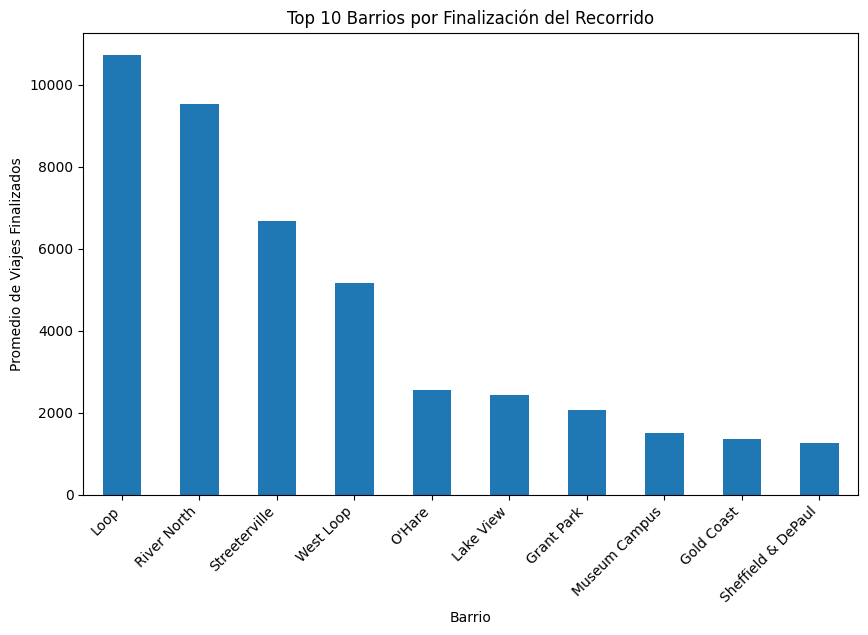

In [10]:
# Gráfica de barras de los 10 principales barrios
top10_viajes.plot(
    x='dropoff_location_name', xlabel= 'Barrio',
    y='average_trips', ylabel= 'Promedio de Viajes Finalizados',
    kind='bar',
    figsize=(10,6),
    title='Top 10 Barrios por Finalización del Recorrido',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.show()

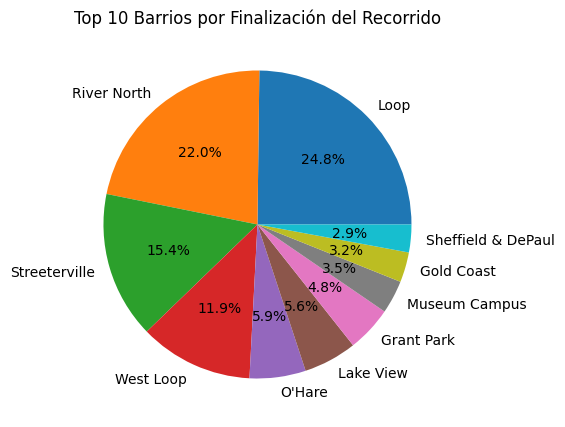

In [11]:
#Gráfica de pastel (piechart) y porcentajes para Top 10 Barrios por Finalización del Recorrido
top10_viajes.set_index('dropoff_location_name')['average_trips'].plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5),
    title='Top 10 Barrios por Finalización del Recorrido'
)
plt.ylabel('')  # Quita el label del eje Y para mejor presentación
plt.show()

## Las 10 principales empresas por número de viajes. ##

In [12]:
top10_compañias = df_01.sort_values(by='trips_amount', ascending=False).head(10)
print(f'Las principales compañias de taxis de la ciudad de Chicago con más viajes son:')
print(top10_compañias)

Las principales compañias de taxis de la ciudad de Chicago con más viajes son:
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


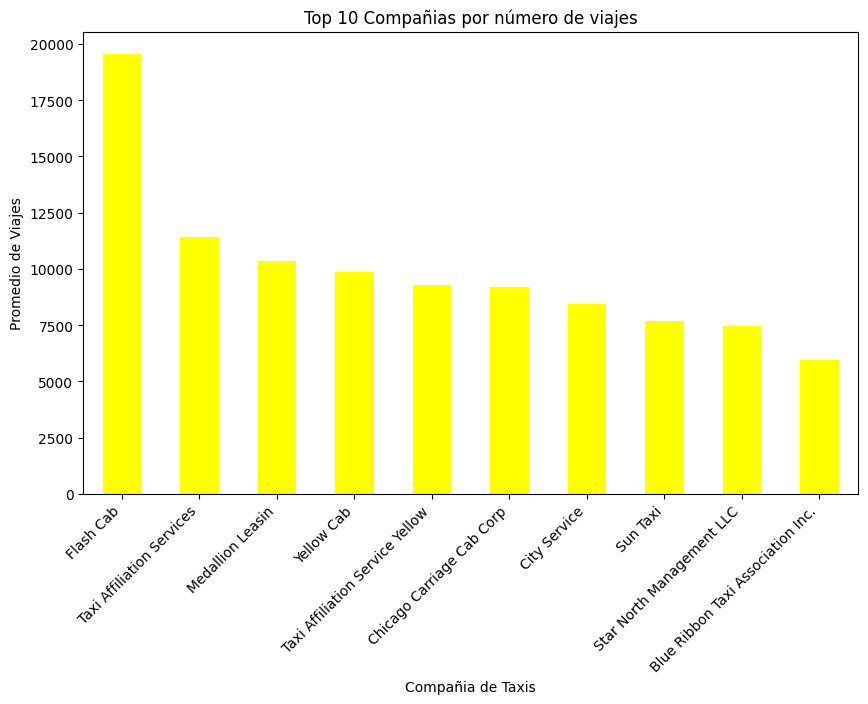

In [13]:
# Gráfica de barras de los 10 principales compañias
top10_compañias.plot(
    x='company_name', xlabel= 'Compañia de Taxis',
    y='trips_amount', ylabel= 'Promedio de Viajes',
    kind='bar',
    color='yellow',
    figsize=(10,6),
    title='Top 10 Compañias por número de viajes',
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.show()

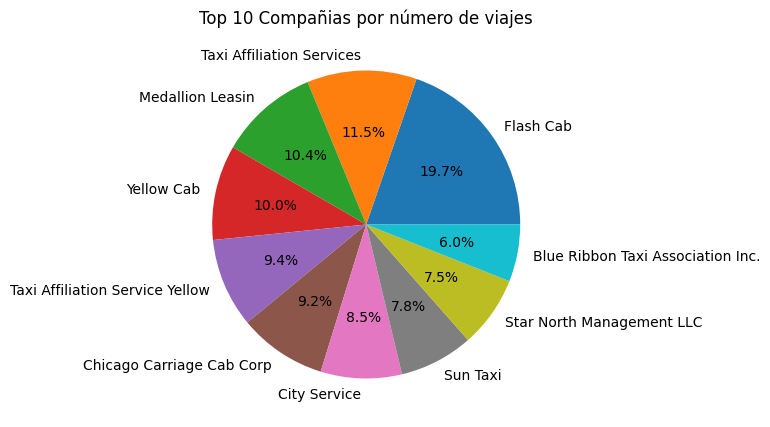

In [14]:
# Gráfica de pastel (pie chart) y porcentajes de las 10 principales compañías
top10_compañias.set_index('company_name')['trips_amount'].plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5),
    title='Top 10 Compañias por número de viajes'
)
plt.ylabel('')  # Quita el label del eje Y para mejor presentación
plt.show()

## Conclusiones ##

Las gráficas de **top10_viajes** y **top10_compañias** arrojan que:

top10_viajes (barrios):
- Los viajes finalizados se concentran en unos pocos barrios de Chicago; siendo los mas destacados dentro del top10 los barrios de Loop, River North, Streeterville, West Loop ya que estos tienen mas del doble de viajes finalizados que los demas. 

- Las gráficas muestran que ciertos barrios son destinos más populares para los taxis, debido a que son zonas céntricas, vibrantes y de gran importancia económica y turística, con una mezcla de oficinas, residencias de alto nivel, hoteles y excelentes opciones de gastronomía y entretenimiento, además de una arquitectura destacada.


top10_compañias (compañias):
- Las gráficas muestran que el mercado está concentrado y dominado por unas cuantas compañias de Taxis seguramente por su cobertura, reputacion o antiguedad. Dentro del Top10 destaca sobre las demás Flash Cab que es una compañia que opera desde 1945, fue la primera empresa de despacho de taxis en Estados Unidos en ofrecer servicio de radio bidireccional, lo que permitió a los conductores comunicarse finalmente con sus despachadores.

- La empresa fue fundada por el veterano de guerra Arthur Dickholtz fallecido en mayo de 1988.

Conclusión general:
Las gráficas de destinos y compañias muestran una concentración significativa, esto es relevante pues:

- Se pueden enfocar estrategias de negocio, marketing o mejoras en el servicio en los barrios y empresas más relevantes.

- De igual manera se puede prestar atencion y promoción para barrios que no estan en el Top10 para generar mejores ganancias en ellos.



## Pruebas de Hippótesis para el df_07 ##


**Hipótesis Nula (Ho)** 
- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos"

**Hipótesis Alternativa (H1)** 
- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

**Criterios**
- Nivel de significancia (alpha) = 0.05 
- Si el valor p es menor que 0.05, rechazaremos la hipótesis nula.


In [15]:
# Convertir start_ts a datetime
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [20]:
# Filtrado y asignacion de día Sabado
# ... (Tu código anterior)
df_07['weekday'] = df_07['start_ts'].dt.dayofweek
saturdays = df_07[df_07['weekday'] == 5]

# Filtrado de sábados lluviosos ('bad') y no lluviosos ('good')
rainy_sat = saturdays[saturdays['weather_conditions'].str.lower() == 'bad']
clear_sat = saturdays[saturdays['weather_conditions'].str.lower() == 'good']

# Calculado de duración promedio para cada condicion meteorológica
mean_rain = rainy_sat['duration_seconds'].mean()
mean_no_rain = clear_sat['duration_seconds'].mean()
print(f'Duración promedio sábados lluviosos: {mean_rain:.2f} segundos')
print(f'Duración promedio sábados no lluviosos: {mean_no_rain:.2f} segundos')

# ----------------------------------------------------------------------
## Prueba de igualdad de varianzas (Levene)
# ----------------------------------------------------------------------
p_umbral = 0.05 # Se usa el mismo umbral que para el t-test
# Realiza la prueba de Levene
levene_test = st.levene(rainy_sat['duration_seconds'], 
                       clear_sat['duration_seconds'])
p_levene = levene_test.pvalue

print(f'\n--- Prueba de Levene ---')
print(f'Valor p de Levene: {round(p_levene, 4)}')

# Determina el valor de equal_var
if p_levene > p_umbral:
    equal_var_flag = True
    print('Varianzas son consideradas IGUALES (p-levene > alpha). Usar equal_var=True.')
else:
    equal_var_flag = False
    print('Varianzas son consideradas DESIGUALES (p-levene <= alpha). Usar equal_var=False.')

# ----------------------------------------------------------------------
## Prueba t-test
# ----------------------------------------------------------------------
# Usa el resultado de Levene para el argumento equal_var
t_test_result = st.ttest_ind(rainy_sat['duration_seconds'], 
                             clear_sat['duration_seconds'], 
                             equal_var=equal_var_flag)
p_ttest = t_test_result.pvalue

print(f'\n--- Prueba t-test (con Levene) ---')
print(f'Valor p del t-test: {round(p_ttest, 4)}')
print(f'Parámetro equal_var usado: {equal_var_flag}')

# Decisión
if p_ttest < p_umbral:
    print("\nRechazamos la hipótesis nula: \n La duración promedio SI cambia los sábados lluviosos.")
else:
    print("\nNo se rechaza la hipótesis nula: \n La duración promedio NO cambia los sábados lluviosos.")

Duración promedio sábados lluviosos: 2427.21 segundos
Duración promedio sábados no lluviosos: 1999.68 segundos

--- Prueba de Levene ---
Valor p de Levene: 0.5332
Varianzas son consideradas IGUALES (p-levene > alpha). Usar equal_var=True.

--- Prueba t-test (con Levene) ---
Valor p del t-test: 0.0
Parámetro equal_var usado: True

Rechazamos la hipótesis nula: 
 La duración promedio SI cambia los sábados lluviosos.


Las hipótesis se plantearon para saber si las condiciones climáticas impactan en el tiempo promedio de los viajes en los días sábados. La prueba t es adecuada para comparar medias de dos grupos independientes.

El nivel de significancia elegido fue 0.05 (5%) si el valor p es menor a este, hay suficiente evidencia estadística para rechazar la hipótesis nula y aceptar que sí existe una diferencia entre la duración promedio de los viajes entre ambos grupos. Se eligio este valor de significancia ya que es el nivel más convencional y se utiliza en muchos campos, como las ciencias sociales.


# Conclusiones Finales

- 1.- Existe una alta **Concentración de Viajes** en unos pocos barrios de la ciudad de Chicago que destacan por una mayor cantidad de viajes finalizados indicando estas zonas como de alta demanda y actividad.

- 2.- Hay un **Dominio de Compañias** que acaparan gran parte de mercado por su reputación, cobertuta y antiguedad que influyen en la preferencia de los usuarios.

- 3.- El **Clima** es un factor importante que impacta en la duración promedio de los viajes los dias Sabados seguramente también en el costo para el usuario.

Se pueden implementar estrategias para no descuidar estas zonas que ya generan una mayor ganancia con  mejoras en el servicio en los barrios y compañías más relevantes, también se pueden identificar oportunidades para promover zonas no tan concurridas. Todos estos patrones se pueden estudiar para optimizar la operación, mejorar la experiencia del usuario y equilibrar la demanda en toda la ciudad.